**Sub-Task 1.1:** <br>
Select the stations which are (1) in Bayern, (2) still active and (3) started before 1950. It should be **38 stations**. **Use** **Pandas** to read the station description file [KL_Jahreswerte_Beschreibung_Stationen.txt] (https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/annual/kl/historical/KL_Jahreswerte_Beschreibung_Stationen.txt) from the historical KL data collection.

Have a look at the available Jupyter notebooks in the geodata git repository. Especially the following could be a good starting point: gdms0180_DWD_NRW_Annual_Temp_vs_Altitude/gnb0181_DWD_NRW_Annual_Temp_vs_Altitude_V001.ipynb

Modify the notebook according to your needs.

# Task 1.1: Selecting Weather Stations in Bayern (Bavaria)

This task involves selecting weather stations that meet specific criteria: they must be located in Bayern, still active as of 2023, and started before 1950. We will use Pandas to read the station description file from the historical KL data collection and make necessary modifications to achieve this.

Steps:
Data Source:

I use the station description file provided by DWD (Deutscher Wetterdienst). The file can be accessed here. https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/annual/kl/historical/KL_Jahreswerte_Beschreibung_Stationen.txt
Modifications I made to the Notebook:

I based my solution on the Jupyter notebook gdms0180_DWD_NRW_Annual_Temp_vs_Altitude/gnb0181_DWD_NRW_Annual_Temp_vs_Altitude_V001.ipynb.
The directory was changed from recent to historical to fetch historical data.
The following lines of code were added to select stations meeting the specified criteria:

inBAY = (df_stations['state'] == "Bayern").values

isActive2023 = (df_stations['date_to'] > "2023").values 

isActive1950 = (df_stations['date_from'] < "1950").values 

station_ids_selected = df_stations[inBAY & isActive2023 & isActive1950].index

print(f"Stations located in Bayern and still active in 2023 and started before 1950: \n{list(station_ids_selected)}")

This code selects stations in Bayern that were active in 2023 and started before 1950.

I created a geometrical point for each station using latitude and longitude values.
Code used:

geometry = gpd.points_from_xy(df_stations.longitude, df_stations.latitude)
df_stations['geometry'] = geometry

Additionally, I changed CRS (Coordinate Reference System) values to EPSG:25832 (CRS for Germany) using the to_crs function.
Results:
38 stations were detected that met the specified criteria

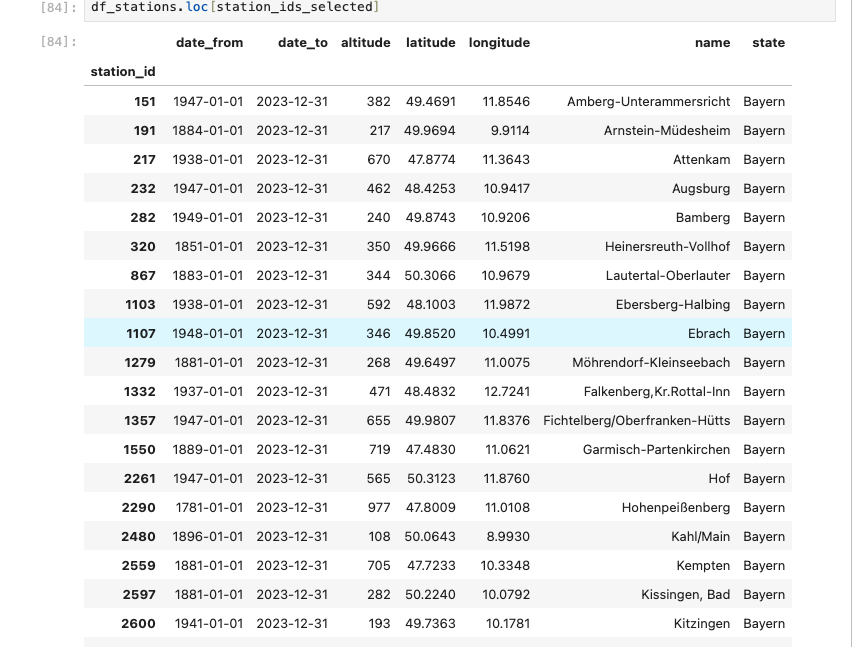

**Sub-Task 1.2:** <br>
Use geopandas in your Jupyter notebook to create a geopackage layer with exactly the 12 stations matching the above criteria. Load this into QGIS and use the NRW WMS service with the topographic map collection as a background map. Create a nicely designed and completely annotated map using EPSG:25832. Use the station IDs together with the station names as labels.  


# Sub-Task 1.2: Creating a Geopackage Layer and Annotated Map in QGIS
In this task, we utilize geopandas in a Jupyter notebook to create a geopackage layer containing stations that match the criteria specified in Sub-Task 1.1. We then load this layer into QGIS, overlay it with the Bayern WMS service using the topographic map collection (DTK500) as a background map, and create a nicely designed and annotated map.

**Steps:**

*Creating Geopackage Layer:*
We used geopandas to create a geopackage layer from the dataframe containing stations meeting the criteria from Sub-Task 1.1.
The function to_file was used to save the dataframe as a geopackage file named output.gpkg.

*Loading Data into QGIS:*
In QGIS, we added the geopackage layer containing the selected stations.
We also added the Bayern WMS service, specifically the topographic map collection (DTK500), as a background map.

*Creating Annotated Map:*
Using the 'Print Layout' option in QGIS, we designed a map with the selected stations overlaid on the background map.
Station IDs and names were added as labels to the map for easy identification.
    
*Results:*
The final map provides a visual representation of the selected stations in Bayern, overlayed on the topographic map background.
Each station is labeled with its ID and name for easy reference.(see below)
    
*Additional Notes:*
    We used EPSG:25832 as the coordinate reference system for consistency.
Ensure that the station names and IDs are clearly visible and properly positioned on the map for easy interpretation.

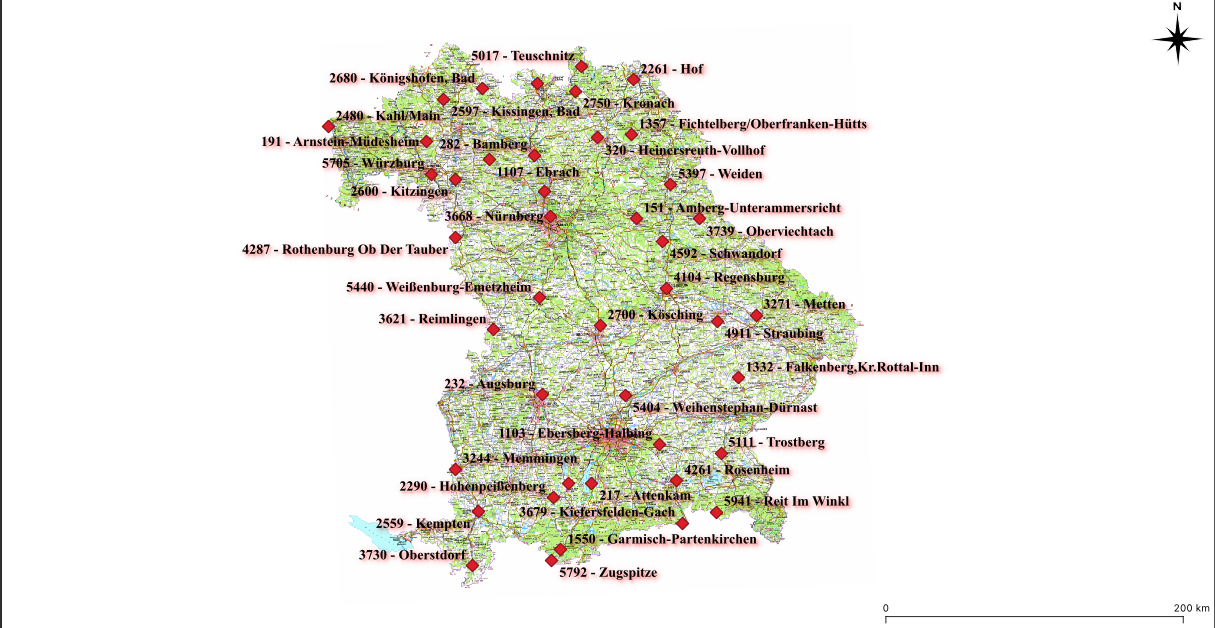

**Sub-Task 1.3:** <br>
Extend your Jupyter notebook to automatically download (using ftplib, wget, or similar) the annual temperature data from the KL data collection, i.e. which automatically downloads the data according to the selected station IDs in the station info dataframe from here: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/annual/kl/historical/

# Sub-Task 1.3: Automatically Downloading Annual Temperature Data

In this task, I extended our Jupyter notebook to automatically download the annual temperature data from the KL data collection for the selected station IDs. Using the requests library to fetch the data from the provided URL.

**Steps:**

Defining URL and Local Directory:

I specified the URL of the KL data collection for annual temperature data, which is: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/annual/kl/historical/.
Additionally, we defined a local directory where the temperature data files will be stored.
                                   
Downloading Data for Selected Stations:

I iterated over the selected station IDs obtained from Sub-Task 1.1.
For each station, we constructed the filename for the temperature data and generated the full URL for downloading.
Using requests.get(), we fetched the temperature data file from the URL.
The downloaded file was saved to the local directory using open() in binary write mode.
A print statement confirms successful download for each station.
                                                                                                 
**Results:**
                                                                                                 
Annual temperature data files were automatically downloaded for each selected station ID.
Any errors encountered during the download process were logged and printed for reference.
                                                                          
**Additional Notes:**
                                                                          
Ensure that the local directory specified for storing the temperature data files exists and has appropriate permissions.

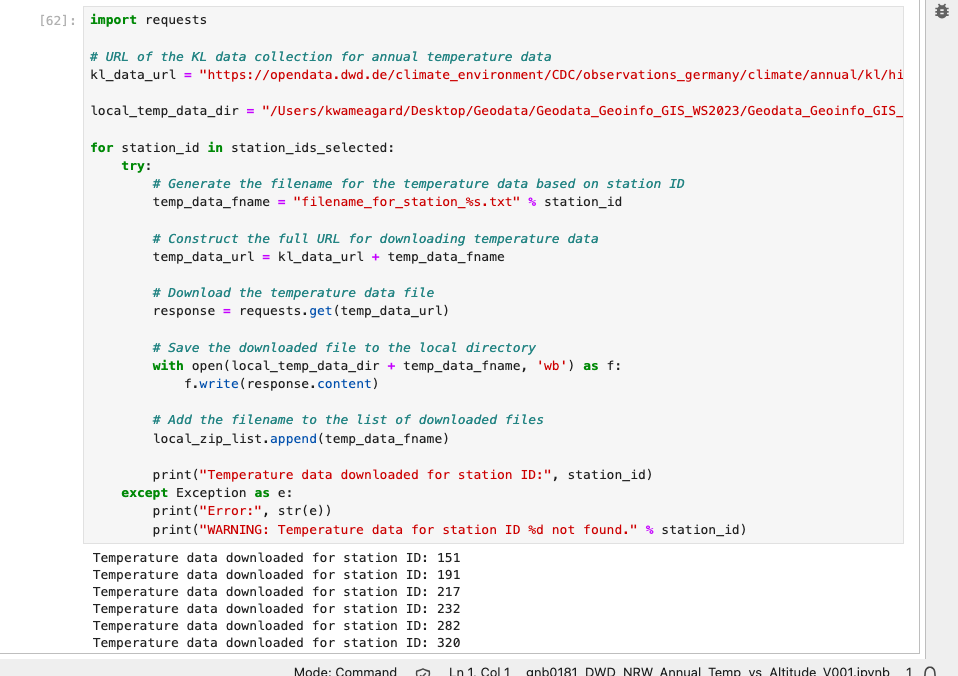

**Sub-Task 1.4:** <br>
Use the dataframe with the temperature time series merged columnwise together with seaborn to plot the waring stripes. The diagram with five stations and not including recent data (2022 missing) looks like:
Create a similar plot but for the selected stations including the annual temperature data of 2022. Let the time series run from 1950 to 2022. Copy the relevant code from notebook gdms0155_DWD_NRW_5_Warming_Stripes/gdms155_DWD_NRW_5_Warming_Stripes.ipynb.
                         
Note that for a station with ID $\mathrm{sno}$, the temperature $\Delta T_\mathrm{sno}(k)$ shown in year $k$ is the negative (blue) or positive (red) deviation from the reference temperature ${\bar{T}}_{\mathrm{sno}}$, which is the mean annual temperature of the station between 1961 and 1990. 

$$
\Delta T_\mathrm{sno}(k) = T_\mathrm{sno}(k) - \bar{T}_\mathrm{sno}
$$

# Sub-Task 1.4: Creating Warming Stripes Plots

In this task, I used the dataframe containing the temperature time series merged columnwise together with Seaborn to plot warming stripes. Additionally, I created a similar plot for the selected stations, including the annual temperature data of 2022, with the time series running from 1950 to 2022.

**Steps:** 

Copying Relevant Code:

We copied the relevant code from the notebook gdms0155_DWD_NRW_5_Warming_Stripes/gdms155_DWD_NRW_5_Warming_Stripes.ipynb.
This code provides functionality to create warming stripes plots using Seaborn.
    
DataFrame Index Adjustment:

I ensured that the index of the dataframe captured only the year component of the timestamps. This is crucial for plotting warming stripes over time.
    
Generating Warming Stripes:

I utilized Seaborn to generate warming stripes plots for the temperature time series.
One plot was created for the merged temperature time series columnwise.
Additionally, I created another plot for the selected stations, including the annual temperature data of 2022. The time series ranged from 1950 to 2022.
                                     
**Results:**
                                     
Three different warming stripes plots were generated:
Warming stripes plot for the merged temperature time series.
Warming stripes plot for the selected stations, including the annual temperature data of 2022.
Another warming stripes plot for the selected stations, excluding the annual temperature data of 2022.
